## Análisis de la cantidad de juegos lanzados por año 📊

En esta sección, vamos a analizar la cantidad de juegos que fueron lanzados en diferentes años utilizando los datos filtrados del archivo `games_preparados.csv`. El objetivo es determinar:

1. **Distribución de lanzamientos**: Ver cuántos juegos se lanzaron en cada año.
2. **Significancia de los datos**: Identificar si hay períodos con muy pocos registros que puedan considerarse no representativos.
3. **Visualización**: Crear un gráfico de barras para visualizar la cantidad de juegos lanzados a lo largo del tiempo.

El análisis de esta información nos ayudará a detectar posibles **patrones** o **tendencias** en el lanzamiento de videojuegos y evaluar la calidad de los datos en cada período.


Primeras filas del archivo:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Cantidad de juegos lanzados por año:


year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

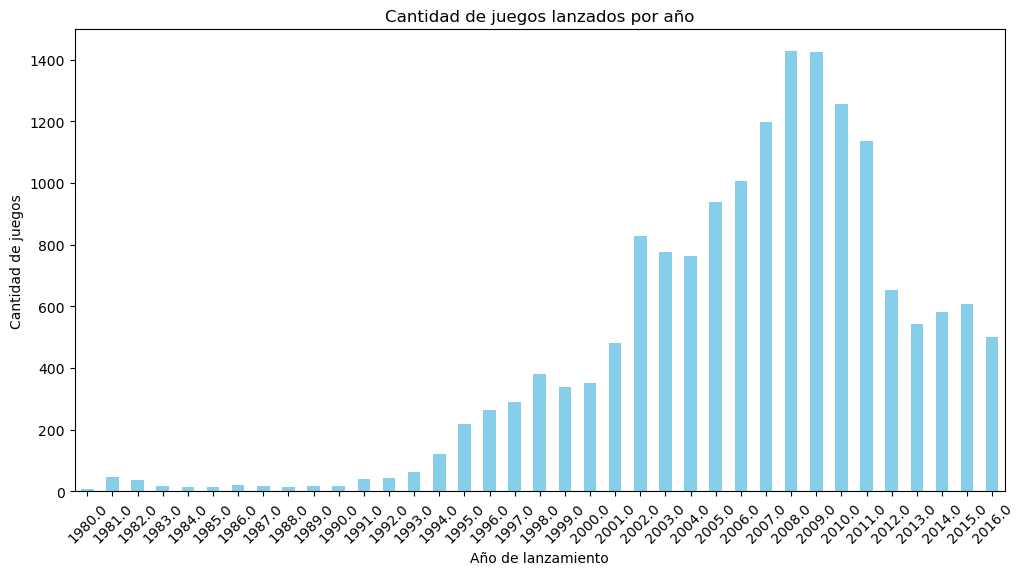

In [1]:
import pandas as pd

# Cargar el archivo CSV preparado
file_path = 'games_preparados.csv'  # Asegúrate de que esté en la misma carpeta
df = pd.read_csv(file_path)

# Verificar los primeros registros para confirmar carga
print("Primeras filas del archivo:")
display(df.head())

# Contar cuántos juegos se lanzaron en cada año
# Eliminamos valores nulos en la columna 'year_of_release'
games_per_year = df['year_of_release'].dropna().value_counts().sort_index()

# Mostrar los resultados
print("Cantidad de juegos lanzados por año:")
display(games_per_year)

# Gráfica opcional para visualizar los datos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.show()


## Análisis de ventas por plataforma a lo largo del tiempo

En esta sección, vamos a analizar cómo varían las ventas de videojuegos entre las diferentes plataformas a lo largo de los años. Para ello:

1. Identificaremos las **plataformas con mayores ventas totales** y analizaremos su distribución de ventas por año.
2. Examinaremos **plataformas populares** que, con el tiempo, ya no tienen ventas, buscando identificar las tendencias de desaparición de plataformas.
3. Analizaremos cuánto **tiempo tardan las nuevas plataformas en aparecer** y las **antiguas en desaparecer**, observando su ciclo de vida en el mercado.

Este análisis nos permitirá entender mejor la evolución del mercado de videojuegos y cómo las plataformas de juego han sido exitosas o han caído en desuso.


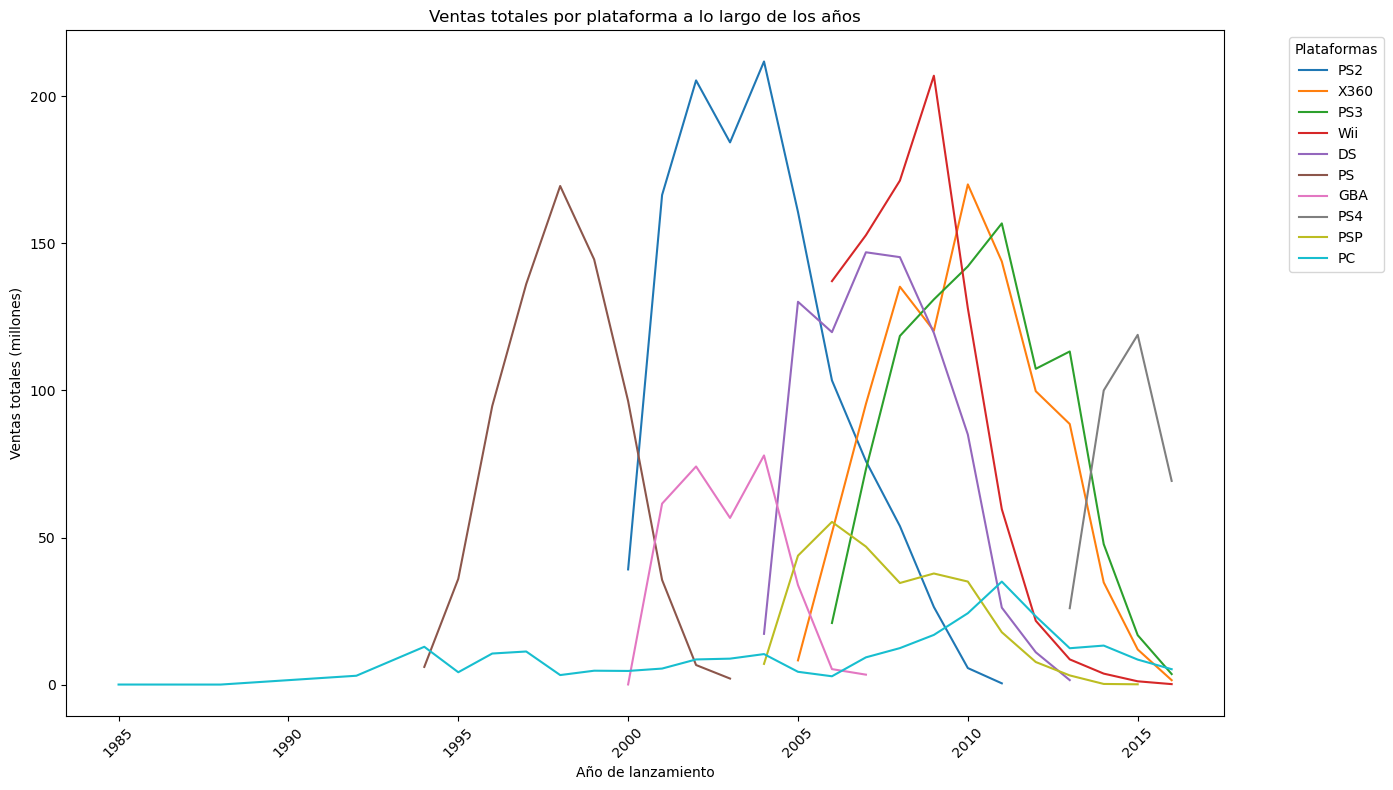

Plataformas sin ventas:
Empty DataFrame
Columns: [na_sales, eu_sales, jp_sales, other_sales, total_sales]
Index: []

Ciclo de vida de las plataformas:
             min     max  lifespan
platform                          
GG        1992.0  1992.0       0.0
PCFX      1996.0  1996.0       0.0
TG16      1995.0  1995.0       0.0
3DO       1994.0  1995.0       1.0
SCD       1993.0  1994.0       1.0
WS        1999.0  2001.0       2.0
NG        1993.0  1996.0       3.0
XOne      2013.0  2016.0       3.0
PS4       2013.0  2016.0       3.0
GEN       1990.0  1994.0       4.0
WiiU      2012.0  2016.0       4.0
PSV       2011.0  2016.0       5.0
3DS       2011.0  2016.0       5.0
SAT       1994.0  1999.0       5.0
N64       1996.0  2002.0       6.0
GC        2001.0  2007.0       6.0
GBA       2000.0  2007.0       7.0
XB        2000.0  2008.0       8.0
SNES      1990.0  1999.0       9.0
2600      1980.0  1989.0       9.0
DS        2004.0  2013.0       9.0
PS        1994.0  2003.0       9.0
PS3      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos filtrados
file_path = 'games_preparados.csv'  # Asegúrate de que esté en la misma carpeta
df = pd.read_csv(file_path)

# 1. Calcular las ventas totales por plataforma
df_platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
df_platform_sales['total_sales'] = df_platform_sales.sum(axis=1)

# 2. Ordenar las plataformas por ventas totales
top_platforms = df_platform_sales.sort_values(by='total_sales', ascending=False).head(10)

# 3. Visualizar la distribución de ventas por plataforma en cada año
plt.figure(figsize=(14, 8))

# Filtrar las plataformas más vendidas
top_platforms_list = top_platforms.index

# Filtrar los datos para las plataformas más vendidas
df_top_platforms = df[df['platform'].isin(top_platforms_list)]

# Graficar ventas por plataforma a lo largo de los años
for platform in top_platforms_list:
    platform_sales = df_top_platforms[df_top_platforms['platform'] == platform]
    platform_sales_grouped = platform_sales.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    platform_sales_grouped['total_sales'] = platform_sales_grouped.sum(axis=1)
    
    # Graficar cada plataforma
    plt.plot(platform_sales_grouped.index, platform_sales_grouped['total_sales'], label=platform)

plt.title('Ventas totales por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Identificar plataformas que ya no tienen ventas
platforms_no_sales = df_platform_sales[df_platform_sales['total_sales'] == 0]

# Mostrar plataformas sin ventas
print("Plataformas sin ventas:")
print(platforms_no_sales)

# 5. Análisis de aparición y desaparición de plataformas
# Ver los primeros y últimos años de cada plataforma
platform_lifespans = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']

# Mostrar el ciclo de vida de las plataformas
print("\nCiclo de vida de las plataformas:")
print(platform_lifespans.sort_values(by='lifespan'))
